# Teaching Emotion Through Feature Matching Using Convolutional Neural Networks 



## Trial #1: VGG16 Model 

Note: Testing first without weights and then with weights 

In [7]:
# Core Dependencies (for all models)
import os
import numpy as np
import matplotlib.pyplot as plt

# Deep Learning Dependencies
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Custom Dependencies (for VGG16 Model) 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout

## Trial #1: VGG16 w/ Random Weights

### Load and Pre-process FER2013 Dataset

In [8]:
# Define image parameters and paths
img_size = (48, 48)
batch_size = 64
dataset_test = 'FER2013/test'
dataset_train = 'FER2013/train'

### Create Data Generators 


In [9]:
# Train/Validation split from folder 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,  # Use part of training as validation
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Create the generators
train_generator = train_datagen.flow_from_directory(
    'FER2013/train',
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Training subset
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    'FER2013/train',
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Validation subset
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'FER2013/test',
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 24406 images belonging to 7 classes.
Found 4303 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Define the Model

In [11]:
# Define VGG16 model
def build_vgg16(input_shape=(48, 48, 1), num_classes=7):
    base_model = VGG16(weights=None, include_top=False, input_shape=input_shape)
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

vgg16_model = build_vgg16()
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,103 (56.38 MB)

 Trainable params: 14,780,103 (56.38 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training (Random Weights)

In [12]:
# Train the model
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
]

history = vgg16_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.2255 - loss: 2.1754 - val_accuracy: 0.2515 - val_loss: 1.8193 - learning_rate: 0.0010
Epoch 2/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.2555 - loss: 1.8152 - val_accuracy: 0.2515 - val_loss: 1.8153 - learning_rate: 0.0010
Epoch 3/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.2530 - loss: 1.8168 - val_accuracy: 0.2515 - val_loss: 1.8100 - learning_rate: 0.0010
Epoch 4/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.2505 - loss: 1.8182 - val_accuracy: 0.2515 - val_loss: 1.8097 - learning_rate: 0.0010
Epoch 5/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.2482 - loss: 1.8161 - val_accuracy: 0.2515 - val_loss: 1.8097 - learning_rate: 0.0010
Epoch 6/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.2508 - loss: 1.8131 - val_accuracy: 0.2515 - val_loss: 1.8100 - learning_rate: 0.0010
Epoch 7/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.2521 - loss: 1.

### Evaluate on Test Set 

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = vgg16_model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 242ms/step - accuracy: 0.2223 - loss: 1.8796
Test Loss: 1.8126, Test Accuracy: 0.2475


**VGG From-Scratch With No Weights** (7 classes)

Training Results:
- Accuracy: 0.2223
- Loss: 1.8796

Test Results:
- Accuracy: 0.2475
- Loss: 1.8126

**Question: Was this model successful?** No.

**Analysis**: Both training accuracy (0.2223) and test accuracy (0.2475) are very low, indicating that the model struggles to learn meaningful patterns for the 7-class classification task. The test accuracy is only slightly better than random guessing (random accuracy for 7 classes is approximately 1/7 ≈ 0.1429), suggesting that the model is not effectively learning the task.

The training loss (1.8796) and test loss (1.8126) are high, indicating that the model is far from optimal convergence. The small gap between training and test loss suggests that the model is underfitting, meaning it is not learning enough from the data.


**Conclusion:** Training VGG from scratch on the FER2013 dataset results in poor performance due to the dataset's limitations and the lack of pretrained weights. The model underfits the data, as evidenced by the low accuracy and high loss. Using pretrained weights, reducing the number of classes, and applying data augmentation could significantly improve performance.

### Plot Training History 

This is intial plot training history to show failure with using a model without any predefined weights.

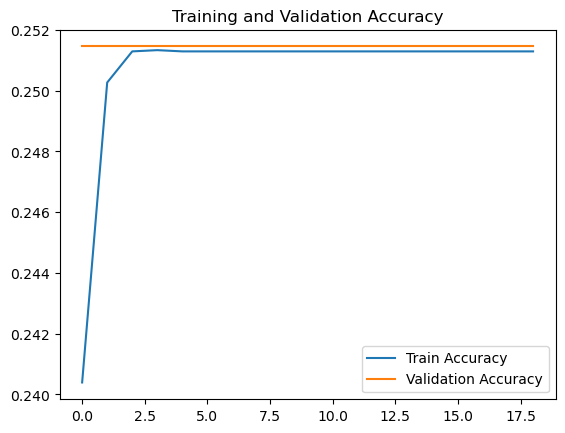

In [14]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

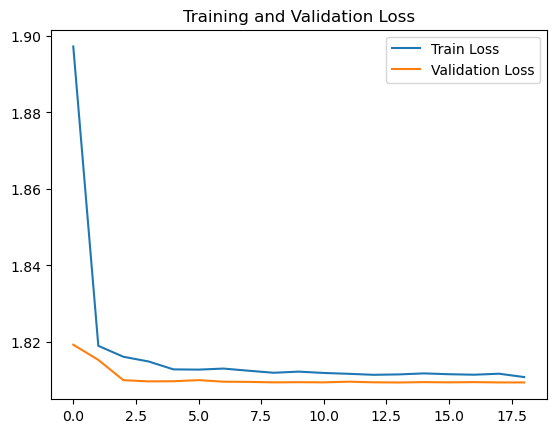

In [15]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Trial #2: VGG16 with RGB Conversion 

In [16]:
# Define image parameters and paths (adding rgb)
img_size = (48, 48)
batch_size = 64
rgb_size = (48, 48, 3)  # 3-channel input for VGG16 with ImageNet 

### Re-define the Data Generators (w/ RGB Conversion)

In [17]:
def to_rgb(img):
    return np.repeat(img, 3, axis=2)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    dataset_train,
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_train,
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    dataset_test,
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 24406 images belonging to 7 classes.
Found 4303 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Load VGG16 Base w/ IMAGENET Weights

In [18]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=rgb_size)

# Freeze all base layers
for layer in base_model.layers:
    layer.trainable = False

In [19]:
# Add custom classifier head 
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(7, activation='softmax')(x)

### Create Model (Test 2)

In [20]:
# Create the model
model_2 = Model(inputs=base_model.input, outputs=output)

model_2.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         1,79

 Total params: 15,110,471 (57.64 MB)

 Trainable params: 395,783 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
# Train the model w/ ImageNet Weights 
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
]

history = model_2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 113s 295ms/step - accuracy: 0.2170 - loss: 1.8982 - val_accuracy: 0.3096 - val_loss: 1.7208 - learning_rate: 1.0000e-04
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 117s 306ms/step - accuracy: 0.2922 - loss: 1.7472 - val_accuracy: 0.3363 - val_loss: 1.6847 - learning_rate: 1.0000e-04
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 117s 306ms/step - accuracy: 0.3126 - loss: 1.7074 - val_accuracy: 0.3451 - val_loss: 1.6583 - learning_rate: 1.0000e-04
Epoch 4/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 117s 306ms/step - accuracy: 0.3232 - loss: 1.6780 - val_accuracy: 0.3518 - val_loss: 1.6479 - learning_rate: 1.0000e-04
Epoch 5/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 118s 310ms/step - accuracy: 0.3414 - loss: 1.6624 - val_accuracy: 0.3591 - val_loss: 1.6301 - learning_rate: 1.0000e-04
Epoch 6/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 125s 328ms/step - accuracy: 0.3480 - loss: 1.6518 - val_accuracy: 0.3639 - val_loss: 1.6275 - learning_rate: 1.0000e-04
Epoch 7/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 

### Evaluate the Model 

In [22]:
# Evaluate the model (test #2)
test_loss, test_accuracy = model_2.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 291ms/step - accuracy: 0.3399 - loss: 1.6217
Test Loss: 1.4808, Test Accuracy: 0.4245


**VGG16 w/ RGB Conversion** (7 classes)

Training Results: 
- Accuracy: 0.3399
- Loss: 1.6217

Test Results:
- Accuracy: 0.4245
- Loss: 1.4808

**Question: Was this model successful?** No.

**Analysis**: The training accuracy (33.99%) and test accuracy (42.45%) are better than random guessing (random accuracy for 7 classes is approximately 1/7 ≈ 14.29%), but they are still relatively low. The training loss (1.6217) and test loss (1.4808) are relatively high, suggesting that the model is far from optimal convergence. The small gap between training and test loss indicates that the model is not overfitting but is instead underfitting.

**Conclusion:** The VGG16 model with RGB conversion performs moderately well, achieving a test accuracy of 42.45%. While it outperforms other models trained on the same dataset, it still struggles due to the FER2013 dataset's limitations and the domain mismatch between ImageNet and FER2013. Improvements such as fine-tuning, data augmentation, and class reduction could help enhance the model's performance.